In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

import matplotlib.pyplot as plt

device_name = tf.test.gpu_device_name()

if device_name == '/device:GPU:0':
    print('Found GPU at:{}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at:/device:GPU:0


In [ ]:
kw_ = pd.read_excel('kw_.xls', index_col=0)
kwl = kw_.index.tolist()

df = pd.read_csv('parsed_title.csv', converters={"parsed_title": lambda x: x.strip("[]''").split(", ")})
# [x for x in df.parsed_title if x in kwl]


def f(vl):
    for x in vl:
        if x in kwl:
            return True
        else:
            return False
    return False


# df['parsed_title'].apply(lambda x: f(x))
df = df[df['parsed_title'].apply(lambda x: f(x))]
se = df['parsed_title'].apply(Counter)

In [82]:
# df.pivot_table(index=['number_label'], columns=['parsed_title'], aggfunc=[len], fill_value=0)
X = pd.DataFrame.from_records(se).fillna(value=0)
# X = np.asarray(kw_['frequency'])
scale = StandardScaler()
# X = X.reshape(-1, 1)
X = scale.fit_transform(X)
# X.shape

# dist = 1 - cosine_similarity(X)

In [91]:
X

array([[ 1.88565082e+01, -1.17691864e-02, -3.90610371e-02, ...,
        -5.88428754e-03, -5.88428754e-03, -5.88428754e-03],
       [-5.30320879e-02,  8.49676409e+01, -3.90610371e-02, ...,
        -5.88428754e-03, -5.88428754e-03, -5.88428754e-03],
       [-5.30320879e-02, -1.17691864e-02,  2.56009588e+01, ...,
        -5.88428754e-03, -5.88428754e-03, -5.88428754e-03],
       ...,
       [-5.30320879e-02, -1.17691864e-02, -3.90610371e-02, ...,
        -5.88428754e-03, -5.88428754e-03, -5.88428754e-03],
       [-5.30320879e-02, -1.17691864e-02, -3.90610371e-02, ...,
        -5.88428754e-03, -5.88428754e-03, -5.88428754e-03],
       [-5.30320879e-02, -1.17691864e-02, -3.90610371e-02, ...,
        -5.88428754e-03, -5.88428754e-03, -5.88428754e-03]])

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
X_reduced.shape

Projecting 4794-dimensional data to 2D


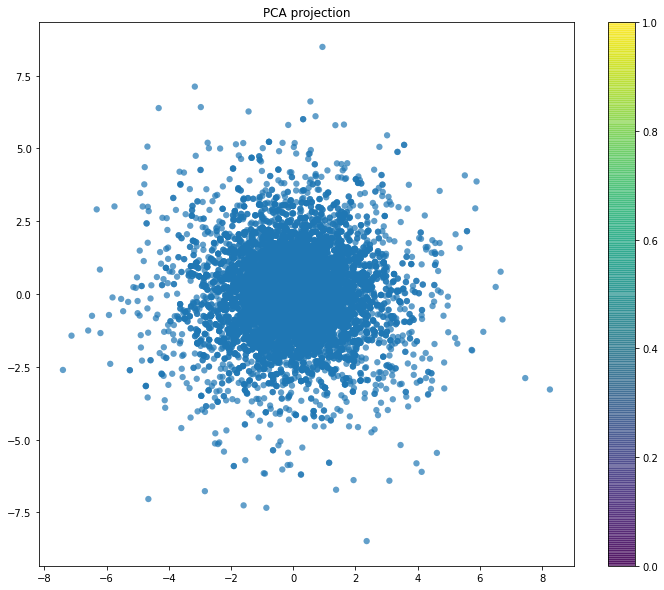

In [88]:
print('Projecting %d-dimensional data to 2D' % X.shape[1])
plt.figure(figsize=(12,10))

plt.scatter(X_reduced[:, 0], X_reduced[:, 1],edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection');